# **Program: 7 Use Machine learning models to predict the number of likes, share or retweets based on platform(Twitter) content and metadata.**

# Importing Dependencies


In [ ]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from textblob import TextBlob

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import seaborn as sns

from PIL import Image

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime

# Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Social\ Media\ Analytics/Twitter-Dataset.zip

Archive:  /content/drive/MyDrive/Social Media Analytics/Twitter-Dataset.zip
  inflating: download.jpg            
  inflating: twitter_dataset.csv     


In [ ]:
df=pd.read_csv("/content/twitter_dataset.csv")

In [ ]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Tweet_ID,Retweets,Likes
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,49.721200,49.929300
std,2886.89568,28.948856,28.877193
min,1.00000,0.000000,0.000000
25%,2500.75000,25.000000,25.000000
50%,5000.50000,49.000000,50.000000
75%,7500.25000,75.000000,75.000000
max,10000.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

,0
Tweet_ID,0
Username,0
Text,0
Retweets,0
Likes,0
Timestamp,0


In [ ]:
df.duplicated().sum()

0

# Feature Engineering


In [ ]:
# Remove duplicate tweets
# df = df.drop_duplicates()

# Remove rows with missing values
# df = df.dropna()

# Clean tweet text by removing special characters and URLs
df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)


#  Porter Stemmer

In [ ]:

# Tokenize tweet text
df['tokens'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Stemming or Lemmatization
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])


In [ ]:
# Calculate summary statistics
mean_retweets = df['Retweets'].mean()
median_likes = df['Likes'].median()
correlation = df['Retweets'].corr(df['Likes'])


In [ ]:

# Perform sentiment analysis on tweet text
df['sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
# Print results
print("Mean Retweets:", mean_retweets)
print("Median Likes:", median_likes)
print("Correlation between Retweets and Likes:", correlation)

Mean Retweets: 49.7212
Median Likes: 50.0
Correlation between Retweets and Likes: 0.012797546201034809


#  Histplot (Histogram Plot)


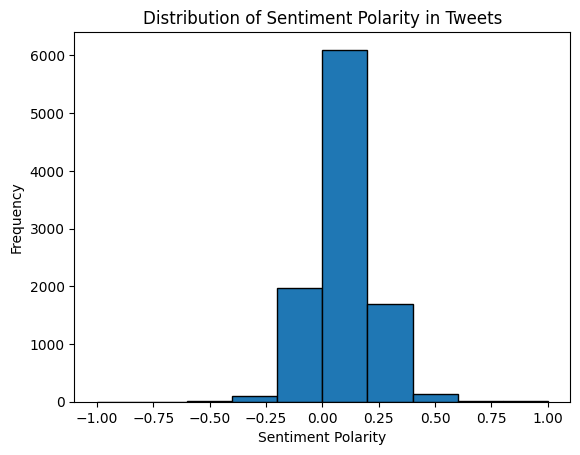

In [ ]:

# Plotting sentiment polarity distribution
plt.hist(df['sentiment_polarity'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Tweets')
plt.show()


In [ ]:
# Print the number of rows and columns in the dataset
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Calculate the average values of retweets and likes
avg_retweets = df['Retweets'].mean()
avg_likes = df['Likes'].mean()
print("Average Retweets:", avg_retweets)
print("Average Likes:", avg_likes)


Number of Rows: 10000
Number of Columns: 8
Average Retweets: 49.7212
Average Likes: 49.9293


In [ ]:
# Find the top users with the highest number of retweets
top_users = df.groupby('Username')['Retweets'].sum().nlargest(10)
print("Top Users by Retweets:")
print(top_users)


Top Users by Retweets:
Username
pjohnson           362
awilliams          306
fsmith             301
wmitchell          269
nbrown             267
davidsmith         263
christopher64      261
amiller            253
ehernandez         251
jessicawilliams    251
Name: Retweets, dtype: int64


#  Barplot


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


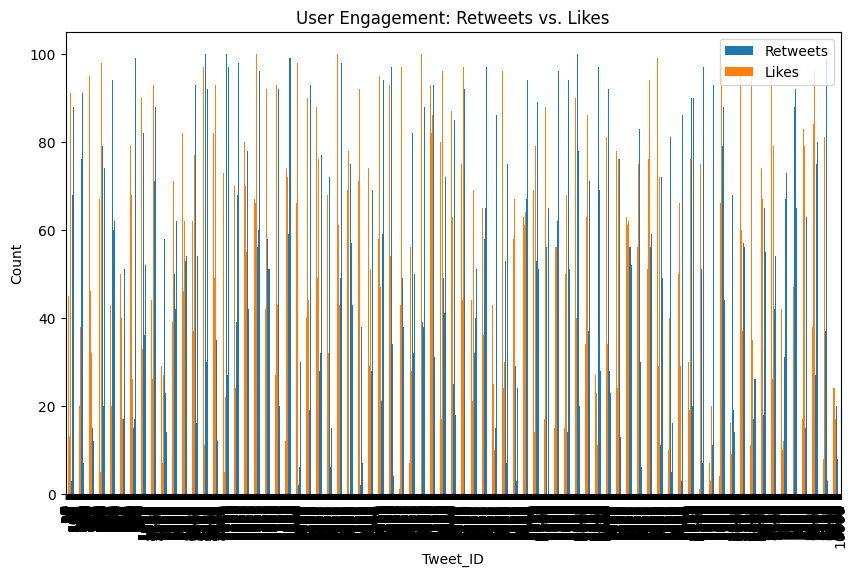

In [ ]:
# Create a bar chart of retweets and likes by username
user_engagement = df.groupby('Tweet_ID')[['Retweets', 'Likes']].sum()
user_engagement.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tweet_ID')    # username can also be taken but due to arge data Tweet_ID has used
plt.ylabel('Count')
plt.title('User Engagement: Retweets vs. Likes')
plt.legend()
plt.show()


In [ ]:
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract time-based features
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,tokens,sentiment_polarity,hour,day_of_week,month
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,"[parti, least, receiv, say, singl, ., prevent,...",0.115714,11,0,1
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,"[hotel, still, congress, may, member, staff, ....",0.308333,22,0,1
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,"[nice, debat, industri, year, ., film, gener, ...",0.220000,11,2,1
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,"[laugh, explain, situat, career, occur, seriou...",0.054762,22,0,4
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,"[involv, sens, former, often, approach, govern...",0.033333,7,1,1


In [ ]:
df = df.drop(columns=['Timestamp'])
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,tokens,sentiment_polarity,hour,day_of_week,month
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,"[parti, least, receiv, say, singl, ., prevent,...",0.115714,11,0,1
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,"[hotel, still, congress, may, member, staff, ....",0.308333,22,0,1
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,"[nice, debat, industri, year, ., film, gener, ...",0.220000,11,2,1
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,"[laugh, explain, situat, career, occur, seriou...",0.054762,22,0,4
4,5,carlwarren,Involve sense former often approach government...,27,80,"[involv, sens, former, often, approach, govern...",0.033333,7,1,1


In [ ]:
# TF-IDF for the 'Text' column
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(df['Text']).toarray()

In [ ]:
# Normalize other numerical features like 'Retweets', 'Likes'
scaler = StandardScaler()
X_metadata = scaler.fit_transform(df[['Likes', 'hour', 'day_of_week', 'month']])
X_metadata

array([[-0.86332998, -0.06836481, -1.48553339, -1.33327596],
       [-0.72480543,  1.52185059, -1.48553339, -1.33327596],
       [-0.86332998, -0.06836481, -0.48668761, -1.33327596],
       ...,
       [ 0.41802205,  0.3653303 , -1.48553339, -0.57577584],
       [ 0.34875978,  0.65446038, -1.48553339, -1.33327596],
       [ 0.14097296, -1.51401517, -0.48668761,  0.9392244 ]])

In [ ]:
# Combine the text and metadata features
X = np.hstack([X_text, X_metadata])

y = df['Retweets']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=1000,max_depth=20,n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_jobs=-1, random_state=42)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 25.424358786794052
Mean Squared Error: 858.2581412806583


In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test[:10].values,   # Actual Retweets values
    'Predicted': y_pred[:10]        # Predicted Retweets values
})

print("Comparison of Actual vs Predicted (First 10 samples):\n", comparison_df)

Comparison of Actual vs Predicted (First 10 samples):
    Actual  Predicted
0      94  44.731804
1      12  51.382922
2      40  50.635621
3      50  53.621649
4      65  48.080975
5       0  49.207168
6      21  49.937717
7      67  53.279022
8      75  49.237680
9       7  51.949282


# **Conclusion**

The project demonstrates the potential of machine learning in quantifying social media engagement through advanced preprocessing, sentiment analysis, and the use of a Random Forest Regressor. It reveals the relationship between content characteristics and user interactions like likes, shares, and retweets. Visualizations enhance data insights and interpretability.